In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)  # or 1000


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklego.preprocessing import PandasTypeSelector
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error, mean_squared_error

from lightgbm import LGBMRegressor

from category_encoders import TargetEncoder

In [2]:
so_df = pd.read_csv('../data/stackoverflow.csv')

/Users/ziqi/opt/anaconda3/envs/sk-experiments/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
so_df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Moderately dissatisfied,Neither satisfied nor dissatisfied,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,1.0,7.0,10.0,8.0,2.0,5.0,4.0,3.0,6.0,9.0,1.0,5.0,3.0,7.0,10.0,4.0,11.0,9.0,6.0,2.0,8.0,3.0,1.0,5.0,2.0,4.0,1.0,3.0,4.0,5.0,2.0,6.0,7.0,I saw an employer’s advertisement,British pounds sterling (£),51000,Yearly,70841.0,GBP,Confluence;Office / productivity suite (Micros...,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,NaN,Agree,Agree,Neither Agree nor Disagree,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Linux-based,2,NaN,Git;Subversion,A few times per week,Yes,Yes,The website I was visiting asked me to disable it,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,NaN,3.0,5.0,1.0,4.0,6.0,7.0,2.0,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,Depends on what it is,Depends on what it is,Upper management at the company/organization,Yes,10 (Very Likely),A few times per month or weekly,Yes,A few times per month or weekly,Yes,"No, I have one but it's out of date",7,Yes,A little bit interested,A little bit interested,A little bit interested,A little bit interested,A little bit interested,Between 6:01 - 7:00 AM,5 - 8 hours,30 - 59 minutes,Never,Ergonomic keyboard or mouse,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
1,7,Yes

In [4]:
(so_df
 .groupby('AssessJob5')
 .agg({'ConvertedSalary': ['min', 'mean', 'median', 'max', len]})
)

ConvertedSalary                                           
                       min           mean   median        max     len
AssessJob5                                                           
1.0                    0.0  114636.509475  67512.0  2000000.0  9235.0
2.0                    0.0  104268.116033  63257.0  2000000.0  8782.0
3.0                    0.0   94250.374226  58340.0  2000000.0  7263.0
4.0                    0.0   89597.748557  52872.0  2000000.0  5719.0
5.0                    0.0   89341.969460  51408.0  2000000.0  4355.0
6.0                    0.0   81042.514268  45420.0  2000000.0  3259.0
7.0                    0.0   88240.893902  41124.0  2000000.0  2460.0
8.0                    0.0   74418.464066  37572.0  2000000.0  1948.0
9.0                    0.0   80024.848718  35178.0  2000000.0  1560.0
10.0                   0.0   66614.714586  28800.0  2000000.0   953.0

In [5]:
(so_df
 .agg({'ConvertedSalary': ['min', 'mean', 'median', 'max', len]})
)

,ConvertedSalary
min,0.000000e+00
mean,9.578086e+04
median,5.507500e+04
max,2.000000e+06
len,4.770200e+04


(array([4.509e+04, 8.350e+02, 4.090e+02, 3.480e+02, 2.440e+02, 4.190e+02,
        4.700e+01, 4.500e+01, 1.200e+01, 2.530e+02]),
 array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000., 2000000.]),
 <a list of 10 Patch objects>)

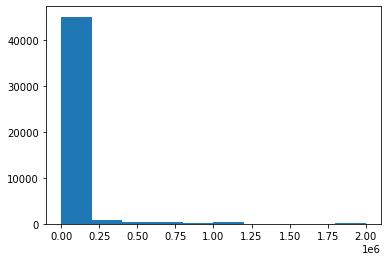

In [6]:
# plt.hist(np.log1p(so_df.ConvertedSalary))
plt.hist(so_df.ConvertedSalary)
# plt.xscale('log')

In [7]:
def q10(x):
    return x.quantile(.10)

def q90(x):
    return x.quantile(.90)



In [8]:

def salary_summary(so_df, var):
    return (so_df
            .groupby(var)
            .agg({'ConvertedSalary': ['min', q10, 'median', q90, 'mean', 'max', len]})
           )

In [9]:
salary_summary(so_df, 'YearsCoding')

ConvertedSalary                                              \
                             min      q10    median       q90           mean   
YearsCoding                                                                    
0-2 years                    0.0   1200.0   13212.0   76119.1   51609.611982   
12-14 years                  0.0  23094.3   67313.5  148801.9  109875.912365   
15-17 years                  0.0  31300.6   76626.5  165000.0  124343.801985   
18-20 years                  0.0  35244.0   85000.0  175000.0  128760.426768   
21-23 years                  0.0  41229.0   95552.0  175000.0  133128.075183   
24-26 years                  0.0  38798.4   96000.0  200000.0  145374.963762   
27-29 years                  0.0  41671.0   96000.0  200000.0  153732.023772   
3-5 years                    0.0   4128.0   29376.0   96000.0   66707.942685   
30 or more years             0.0  48616.0  105000.0  205586.2  155413.456875   
6-8 years                    0.0   7725.9   44287.0  115500.0   83373.084229   
9-11 years                   0.0  14662.5   55392.0  130000.0   94310.455866   

                                      
                        max      len  
YearsCoding                           
0-2 years         2000000.0   3188.0  
12-14 years       2000000.0   4998.0  
15-17 years       2000000.0   3828.0  
18-20 years       2000000.0   3168.0  
21-23 years       2000000.0   1636.0  
24-26 years       2000000.0   1159.0  
27-29 years       2000000.0    631.0  
3-5 years         2000000.0   9788.0  
30 or more years  2000000.0   2029.0  
6-8 years         2000000.0  10234.0  
9-11 years        2000000.0   7024.0

In [10]:
def flatten_columns(df):
    df.columns = ["_".join(df) for df in df.columns.ravel()]
    return df

In [11]:
flatten_columns(
    salary_summary(so_df, 'Country')
).sort_values('ConvertedSalary_median', ascending=False)

,ConvertedSalary_min,ConvertedSalary_q10,ConvertedSalary_median,ConvertedSalary_q90,ConvertedSalary_mean,ConvertedSalary_max,ConvertedSalary_len
Country,,,,,,,
Andorra,48955.0,49689.4,525701.5,1000000.0,525089.500000,1000000.0,4.0
Botswana,140000.0,146000.0,170000.0,194000.0,170000.000000,200000.0,2.0
Saint Lucia,159852.0,159852.0,159852.0,159852.0,159852.000000,159852.0,1.0
Togo,24000.0,51095.5,159477.5,267859.5,159477.500000,294955.0,2.0
Sierra Leone,120000.0,120000.0,120000.0,120000.0,120000.000000,120000.0,1.0
...,...,...,...,...,...,...,...
Swaziland,1488.0,1586.4,1980.0,3564.0,2476.000000,3960.0,3.0
Cuba,156.0,794.4,1944.0,58800.0,62919.368421,1000000.0,19.0
Zambia,1824.0,1824.0,1824.0,1824.0,1824.000000,1824.0,1.0


a.pipe(f) -> f(a)

In [12]:
(so_df
 .pipe(salary_summary, 'Country')
 .pipe(flatten_columns)
 .query('ConvertedSalary_len > 40')
 .sort_values('ConvertedSalary_median', ascending=False)
 .head(40)
)

,ConvertedSalary_min,ConvertedSalary_q10,ConvertedSalary_median,ConvertedSalary_q90,ConvertedSalary_mean,ConvertedSalary_max,ConvertedSalary_len
Country,,,,,,,
United States,0.0,50000.0,100000.0,175000.0,154413.128506,2000000.0,12941.0
Switzerland,0.0,20938.4,93842.0,162451.6,138111.567812,1000000.0,553.0
Israel,0.0,35112.0,90642.0,140392.4,99560.527149,1248000.0,442.0
Norway,0.0,53152.0,82890.0,183633.2,150544.824926,1000000.0,337.0
Denmark,0.0,37640.0,82836.0,139878.0,100477.157303,1000000.0,356.0
Australia,0.0,41506.0,79973.0,149950.0,126623.720339,1000000.0,1180.0
Ireland,0.0,35492.0,74657.0,734328.0,186313.216718,1000000.0,323.0
New Zealand,0.0,33619.0,65776.0,166632.0,133835.951768,1000000.0,311.0
Canada,0.0,32209.0,64417.0,112730.0,100894.343419,2000000.0,1983.0


In [13]:
(so_df
 .pipe(salary_summary, 'Country')
 .pipe(flatten_columns)
 .assign(inequality=lambda x: x['ConvertedSalary_q90'] / x['ConvertedSalary_q10'])
 .query('ConvertedSalary_len > 40')
 .sort_values('inequality', ascending=False)
 .head(60)
)

,ConvertedSalary_min,ConvertedSalary_q10,ConvertedSalary_median,ConvertedSalary_q90,ConvertedSalary_mean,ConvertedSalary_max,ConvertedSalary_len,inequality
Country,,,,,,,,
"Venezuela, Bolivarian Republic of...",24.0,444.0,8100.0,1000000.0,241823.625000,1000000.0,48.0,2252.252252
Viet Nam,0.0,792.0,9516.0,38400.0,19001.617284,285744.0,81.0,48.484848
Nigeria,0.0,829.0,6000.0,39196.8,23543.699248,1000000.0,133.0,47.282027
"Iran, Islamic Republic of...",0.0,660.0,10000.0,25509.6,15644.191419,1000000.0,303.0,38.650909
Other Country (Not Listed Above),0.0,6273.6,35274.5,162512.0,94657.119048,1056000.0,42.0,25.904106
Kenya,0.0,1922.4,12000.0,44400.0,30356.666667,360000.0,57.0,23.096130
Morocco,0.0,2592.0,12000.0,54046.4,20565.981132,100000.0,53.0,20.851235
India,0.0,2256.0,9396.0,46963.0,27694.121486,2000000.0,4091.0,20.816933
Ireland,0.0,35492.0,74657.0,734328.0,186313.216718,1000000.0,323.0,20.689958


In [14]:
def na_performance(so_df, var):

    return (so_df
            .assign(no_experience = lambda x: x[var].isnull())
            .pipe(salary_summary, 'no_experience')
    )

In [15]:
(so_df
 .pipe(na_performance, 'DatabaseWorkedWith')
)

ConvertedSalary                                           \
                          min     q10   median       q90          mean   
no_experience                                                            
False                     0.0  7884.0  55447.5  140764.0  96172.055854   
True                      0.0  5640.0  53851.0  146198.8  93548.955018   

                                   
                     max      len  
no_experience                      
False          2000000.0  40588.0  
True           2000000.0   7114.0

In [16]:
(so_df
 .pipe(na_performance, 'FrameworkWorkedWith')
)

ConvertedSalary                                           \
                          min     q10   median       q90          mean   
no_experience                                                            
False                     0.0  9012.0  57912.0  145000.0  99228.131023   
True                      0.0  5640.0  50000.0  138660.0  88335.792343   

                                   
                     max      len  
no_experience                      
False          2000000.0  32605.0  
True           2000000.0  15097.0

In [17]:
(so_df
 .pipe(na_performance, 'LanguageWorkedWith')
)

ConvertedSalary                                           \
                          min     q10   median       q90          mean   
no_experience                                                            
False                     0.0  7827.0  55562.0  142360.8  96155.116540   
True                      0.0  3534.0  35244.0  125001.4  81521.755738   

                                   
                     max      len  
no_experience                      
False          2000000.0  46482.0  
True           2000000.0   1220.0

In [18]:
(so_df
 .pipe(na_performance, 'HackathonReasons')
)

ConvertedSalary                                           \
                          min     q10   median       q90          mean   
no_experience                                                            
False                     0.0  8768.4  59172.0  146868.0  97721.787904   
True                      0.0  7085.6  52872.0  140000.0  94593.563503   

                                   
                     max      len  
no_experience                      
False          2000000.0  18105.0  
True           2000000.0  29597.0

In [19]:
(so_df
 .pipe(na_performance, 'TimeAfterBootcamp')
)

ConvertedSalary                                           \
                          min     q10   median       q90          mean   
no_experience                                                            
False                     0.0  7015.2  60000.0  145000.0  97038.026176   
True                      0.0  7615.2  55075.0  141000.0  95649.656133   

                                   
                     max      len  
no_experience                      
False          2000000.0   4508.0  
True           2000000.0  43194.0

In [20]:
so_df['cobol'] = so_df.LanguageWorkedWith.str.contains('Cobol')

In [21]:
salary_summary(so_df, 'cobol')

ConvertedSalary                                                       \
                  min     q10   median       q90           mean        max   
cobol                                                                        
False             0.0  7827.0  55562.0  142000.0   95957.630165  2000000.0   
True              0.0  8078.1  58749.0  178830.0  126353.529801  2000000.0   

                
           len  
cobol           
False  46180.0  
True     302.0

In [97]:
so_df.YearsCoding.unique()

so_df['years_coding_int'] = so_df.YearsCoding.map({
    '30 or more years': 35, 
    '6-8 years': 7, 
    '9-11 years': 10, 
    '0-2 years': 1,
    '15-17 years': 16,
    '18-20 years': 19,
    '3-5 years': 4,
    '12-14 years': 13,
    '24-26 years': 25, 
    '21-23 years': 22, 
    '27-29 years:': 28
})


so_df['cobol_int'] = so_df['cobol'].astype(float)
# so_df.groupby(['years_coding_int', 'YearsCoding']).size()
so_df['null_db'] = so_df['DatabaseWorkedWith'].isnull().astype(float)
so_df['null_fwork'] = so_df['FrameworkWorkedWith'].isnull().astype(float)
so_df['null_lang'] = so_df['LanguageWorkedWith'].isnull().astype(float)
so_df['null_hck'] = so_df['HackathonReasons'].isnull().astype(float)
so_df['null_boot'] = so_df['TimeAfterBootcamp'].isnull().astype(float)


In [98]:
# print(so_df.cobol_int.dtypes)

In [99]:
x_df = so_df.drop(columns=['ConvertedSalary', 'Salary'])
y_df = so_df['ConvertedSalary']

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state=42)

Complex model

In [110]:
dict(so_df.dtypes)

{'Respondent': dtype('int64'),
 'Hobby': dtype('O'),
 'OpenSource': dtype('O'),
 'Country': dtype('O'),
 'Student': dtype('O'),
 'Employment': dtype('O'),
 'FormalEducation': dtype('O'),
 'UndergradMajor': dtype('O'),
 'CompanySize': dtype('O'),
 'DevType': dtype('O'),
 'YearsCoding': dtype('O'),
 'YearsCodingProf': dtype('O'),
 'JobSatisfaction': dtype('O'),
 'CareerSatisfaction': dtype('O'),
 'HopeFiveYears': dtype('O'),
 'JobSearchStatus': dtype('O'),
 'LastNewJob': dtype('O'),
 'AssessJob1': dtype('float64'),
 'AssessJob2': dtype('float64'),
 'AssessJob3': dtype('float64'),
 'AssessJob4': dtype('float64'),
 'AssessJob5': dtype('float64'),
 'AssessJob6': dtype('float64'),
 'AssessJob7': dtype('float64'),
 'AssessJob8': dtype('float64'),
 'AssessJob9': dtype('float64'),
 'AssessJob10': dtype('float64'),
 'AssessBenefits1': dtype('float64'),
 'AssessBenefits2': dtype('float64'),
 'AssessBenefits3': dtype('float64'),
 'AssessBenefits4': dtype('float64'),
 'AssessBenefits5': dtype('floa

In [125]:
so_df.OpenSource.value_counts()

No     26645
Yes    21057
Name: OpenSource, dtype: int64

Ideas: 
* all yes/no -> convert to numeric
* search programming languages
* parameter tuning
* number monitors not int? object?

In [133]:
te = TargetEncoder(cols=['Country', 
                         'JobSatisfaction', 
                         'CareerSatisfaction', 
                         'RaceEthnicity', 
                         'CompanySize', 
                         'OperatingSystem'
                        ])

In [140]:
pipe_lgb = Pipeline([
    ('endoer', te),
    ('selector', PandasTypeSelector(include='float64')),
    ('imputer', SimpleImputer(strategy='mean')),
    ('lr', LGBMRegressor(objective='regression_l1'))
])

In [141]:
cv_lgb = cross_val_score(
    pipe_lgb, 
    x_train, 
    y_train, 
    scoring='neg_mean_absolute_error', 
    cv=3
)

In [142]:
- cv_lgb.mean()

53086.352945243685

Baselines

In [24]:
x_test.shape

(11926, 128)

In [25]:
print(x_train.dtypes.head(20))

Respondent              int64
Hobby                  object
OpenSource             object
Country                object
Student                object
Employment             object
FormalEducation        object
UndergradMajor         object
CompanySize            object
DevType                object
YearsCoding            object
YearsCodingProf        object
JobSatisfaction        object
CareerSatisfaction     object
HopeFiveYears          object
JobSearchStatus        object
LastNewJob             object
AssessJob1            float64
AssessJob2            float64
AssessJob3            float64
dtype: object


In [26]:
pipe = Pipeline([
    ('selector', PandasTypeSelector(include='float64')),
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

In [27]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('selector', PandasTypeSelector(include='float64')),
                ('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('lr', LinearRegression())])

In [28]:
mean_absolute_error(pipe.predict(x_test), y_test)

78606.36024578908

In [35]:
simple_model = (x_train
 .assign(y=y_train)
 .groupby('Country')
 .agg({'y': 'median'})
 .reset_index()
)

In [36]:
global_median = y_train.median()
global_median

55075.0

In [48]:
global_mean = y_train.mean()
global_mean

95646.96673747763

In [37]:
simple_predictions = (x_test
 .merge(simple_model, how='left')
 .loc[:, 'y']
)

In [38]:
simple_predictions[simple_predictions.isnull()] = global_median

In [39]:
mean_absolute_error(simple_predictions, y_test)

58623.49387892001

In [47]:
# constant_prediction = y_test * 0 + global_median
constant_prediction = [global_median for i in y_test]
mean_absolute_error(constant_prediction, y_test)

70951.85552574208

In [49]:
constant_prediction_mean = [global_mean for i in y_test]
mean_absolute_error(constant_prediction_mean, y_test)

82711.68644191355

In [53]:
print(np.sqrt(mean_squared_error(constant_prediction, y_test)))
print(np.sqrt(mean_squared_error(constant_prediction_mean, y_test)))

204922.33426222083
200757.61836689684


In [50]:
# global mean
# linear regression
# global median
# country median

# mean absolute error -> median optimizes -> l1 world
# mean squared error -> mean optimizes -> l2 world